In [4]:
from matplotlib import pyplot as plt
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [5]:
evt_x = np.loadtxt("data/fit-data-3.txt")

In [6]:
evt_x.max()

333.47577029952066

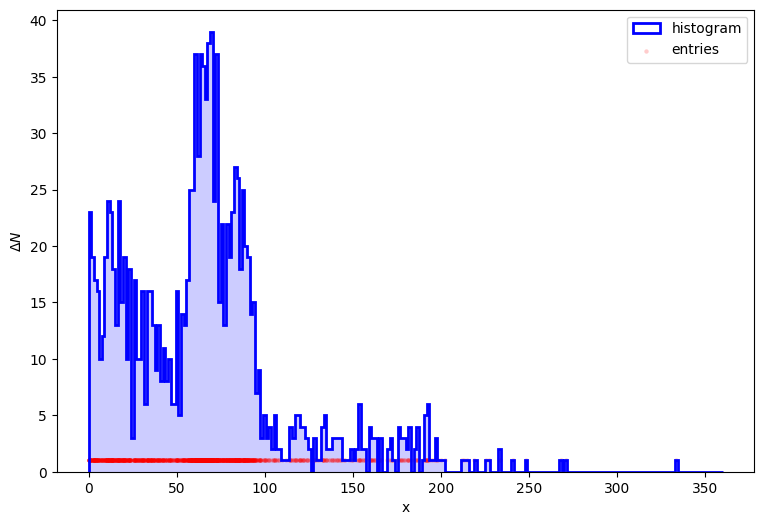

In [7]:
fig, ax = plt.subplots(figsize=(9,6),dpi=100)
n_bins = 240
x_range = (0, 360)
data_y, bins, patches = ax.hist(evt_x, n_bins, range=x_range, density=False, 
    histtype=u'step', edgecolor='b', linewidth=2, label='histogram')
ax.hist(evt_x, n_bins, range=x_range, density=False, color='b', alpha=0.2)
ax.scatter(evt_x, np.full_like(evt_x, 1), marker='o', color='r', s=10, alpha=0.2, linewidth=0, label='entries')
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.legend()
plt.show()

In [8]:
#bins

In [9]:
data_x = (bins+(bins[1]-bins[0])/2)[:-1]
#print(data_x)
#print

In [10]:
data_yerr = np.sqrt(data_y)
#print(data_y)
#print(data_yerr)

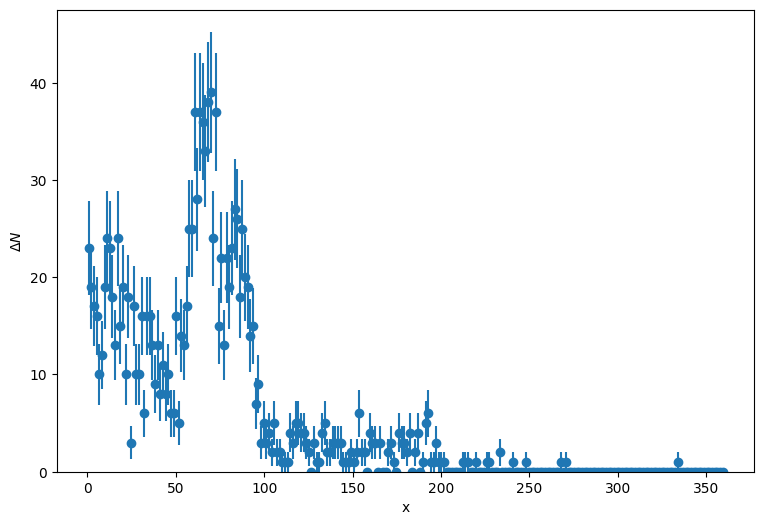

In [11]:
plt.figure(figsize=(9,6),dpi=100)
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.ylim(0)
plt.show()

In [18]:
def bkg_pdf(x, l):
    return np.exp(-x/l)/l
def sig_pdf(x, mu, sigma):
    return np.exp(-((x - mu)/sigma)**2/2)/math.sqrt(2*math.pi*sigma**2)
def bkg_model(x, b, l):
    return b*bkg_pdf(x, l)
def sig_model(x, s1, s2, mu1, sigma1, mu2, sigma2):
    return s1*sig_pdf(x, mu1, sigma1) + s2*sig_pdf(x, mu2, sigma2)
def fit_model(x, *par):
    return bkg_model(x, *par[:2]) + sig_model(x, *par[2:])

In [54]:
least_squares_mode = LeastSquares(data_x[data_y>0], data_y[data_y>0], data_yerr[data_y>0], fit_model)
m = Minuit(least_squares_mode, *(700,70, 80,60,6,70,80,6), name=("B", "$\lambda$", "S1", "S2", "$\mu_1$", "$\sigma_1$", "$\mu_2$","$\sigma_2$"))
m.limits["$\sigma_1$"] = (0, 20)
m.limits["$\sigma_2$"] = (0, 20)
m.limits["$\mu_1$"] = (50, 100)
m.limits["$\mu_2$"] = (50, 100)

In [55]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 160.3 (χ²/ndof = 1.2)      │              Nfcn = 387              │
│ EDM = 3.61e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name       │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B          │  1.08e3   │  0.05e3   │            │            │         │         │       │
│ 1 │ $\lambda$  │    66     │     4     │            │            │         │         │       │
│ 2 │ S1         │    490    │    40     │            │            │         │         │       │
│ 3 │ S2         │    280    │    33     │            │            │         │         │       │
│ 4 │ $\mu_1$    │   65.8    │    0.6    │            │            │   50    │   100   │       │
│ 5 │ $\sigma_1$ │    6.1    │    0.5    │            │            │    0    │   20    │       │
│ 6 │ $\mu_2$    │   85.6    │    0.8    │            │            │   50    │   100   │       │
│ 7 │ $\sigma_2$ │    5.5    │    0.6    │            │            │    0    │   20    │       │
└───┴────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────────┬─────────────────────────────────────────────────────────────────────────────────────────┐
│            │          B  $\lambda$         S1         S2    $\mu_1$ $\sigma_1$    $\mu_2$ $\sigma_2$ │
├────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│          B │   2.65e+03         74     -0.4e3     -0.3e3        1.9      -3.20       -2.1       -3.3 │
│  $\lambda$ │         74       18.5         -5        -20        0.0       0.02       -0.1       -0.3 │
│         S1 │     -0.4e3         -5   1.58e+03     -0.5e3        7.5      10.52       14.3       -9.4 │
│         S2 │     -0.3e3        -20     -0.5e3    1.1e+03       -9.2      -7.47      -12.5       11.9 │
│    $\mu_1$ │        1.9        0.0        7.5       -9.2       0.36       0.12        0.3       -0.2 │
│ $\sigma_1$ │      -3.20       0.02      10.52      -7.47       0.12      0.248       0.21      -0.13 │
│    $\mu_2$ │       -2.1       -0.1       14.3      -12.5        0.3       0.21      0.666       -0.3 │
│ $\sigma_2$ │       -3.3       -0.3       -9.4       11.9       -0.2      -0.13       -0.3      0.383 │
└────────────┴─────────────────────────────────────────────────────────────────────────────────────────┘

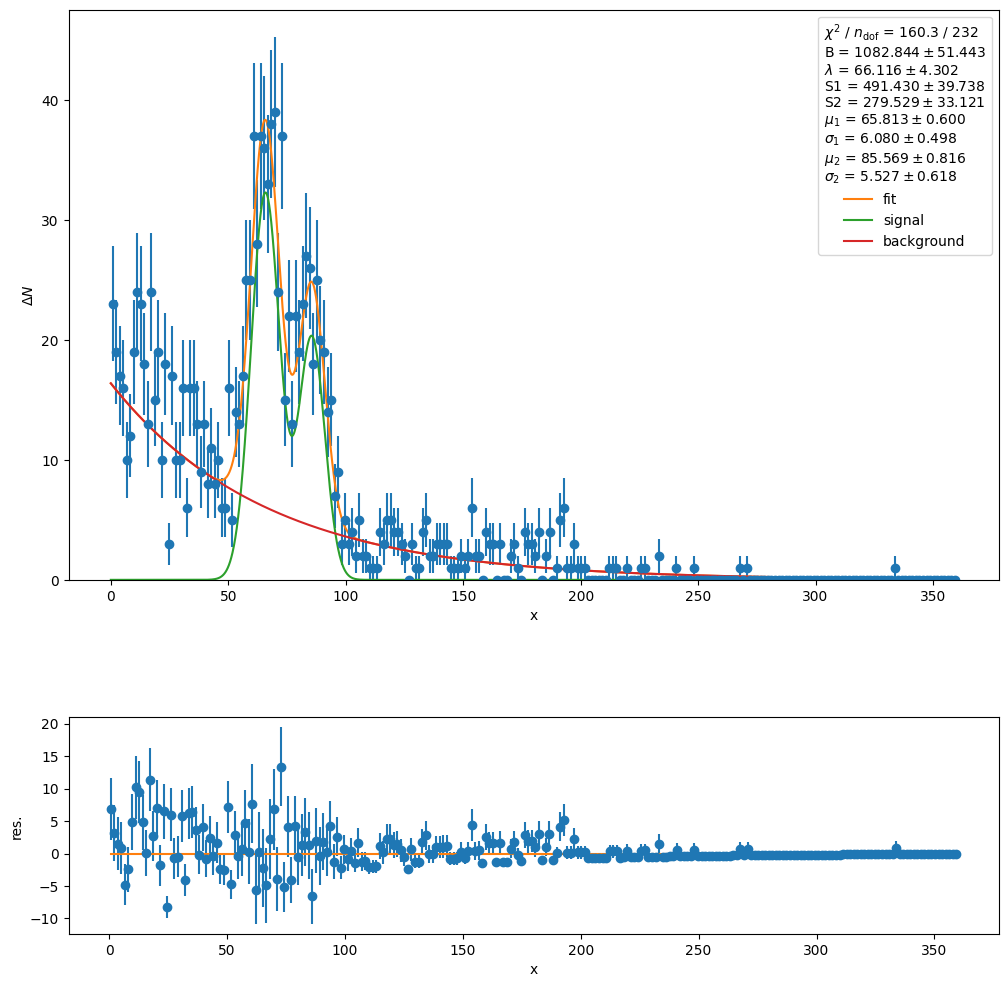

In [56]:
import matplotlib.gridspec as gridspec
data_x_f = np.arange(0, bins[-1], 0.1)
data_y_f = fit_model(data_x_f, *m.values)
bkg_y_f = bkg_model(data_x_f, *m.values[:2])
sig_y_f = sig_model(data_x_f, *m.values[2:])

plt.figure(figsize=(12,12),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o")
ax0.plot(data_x_f, data_y_f, label="fit")
ax0.plot(data_x_f, sig_y_f, label="signal")
ax0.plot(data_x_f, bkg_y_f, label="background")
ax0.set_xlabel('x')
ax0.set_ylabel('$\Delta N$')
ax1.errorbar(data_x, data_y-fit_model(data_x, *m.values), data_yerr, fmt="o")
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel('x')
ax1.set_ylabel('res.')
ax0.set_ylim(0)
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
ax0.legend(title="\n".join(fit_info))
plt.show()
plt.show()
plt.show()

In [57]:
nn = data_yerr >0
pull = (data_y[nn]-fit_model(data_x[nn], *m.values))/data_yerr[nn]

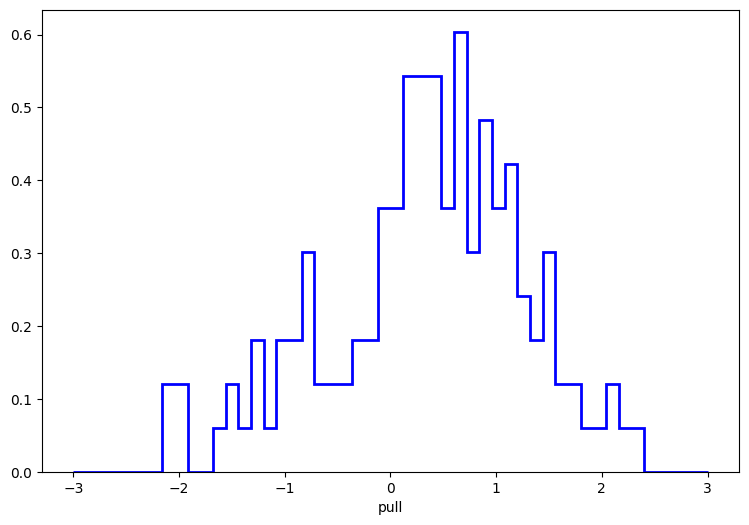

mean:  0.2912316280862952
sigma:  1.0337353943463816


In [58]:
fig, ax = plt.subplots(figsize=(9,6),dpi=100)
n_bins = 50
x_range = (-3, 3)
n, b, p = ax.hist(pull, n_bins, range=x_range, density=True, 
    histtype=u'step', edgecolor='b', linewidth=2, label='histogram')
plt.xlabel('pull')
plt.show()
print("mean: ", pull.mean())
print("sigma: ", pull.std(ddof=0))